### KDE(Kernel Density Estimation)의 이해

**seaborn의 distplot(분포파악)을 이용하여 KDE 시각화**  
https://seaborn.pydata.org/tutorial/distributions.html

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


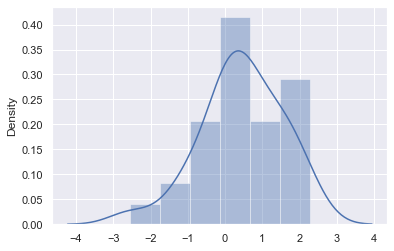

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30) # 정규분포
print(x)
sns.distplot(x); # kde로 추정
# sns.histplot(x, kde=True)

<AxesSubplot:ylabel='Density'>

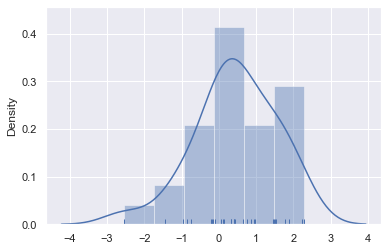

In [7]:
sns.distplot(x, rug=True)  # rug : 밀집도 파악

<AxesSubplot:>

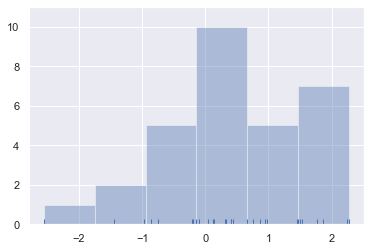

In [8]:
sns.distplot(x, kde=False, rug=True)

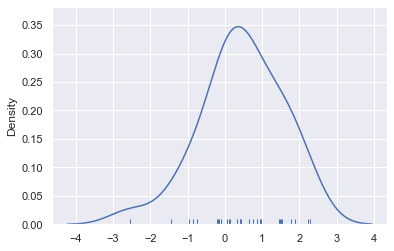

In [9]:
sns.distplot(x, hist=False, rug=True);

**개별 관측데이터에 대해 가우시안 커널 함수를 적용**
- 개별관측치 > KDE 적용 > 합산 > 정규화(나누기 샘플수)  

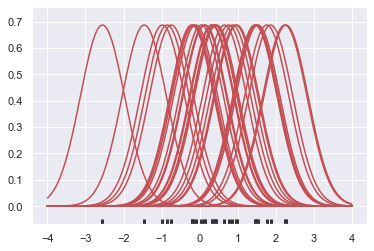

In [10]:
from scipy import stats

#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.) # 최적화 bandwidth
support = np.linspace(-4, 4, 200) # 표현

# 커널 계산
kernels = []
for x_i in x:
    # 개별 관측에 대해
    kernel = stats.norm(x_i, bandwidth).pdf(support)  # 정규분포 pdf 반환
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

In [12]:
kernel.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.001, 0.001, 0.001, 0.001, 0.002, 0.002, 0.003, 0.003,
       0.004, 0.005, 0.007, 0.008, 0.01 , 0.012, 0.015, 0.018, 0.021,
       0.026, 0.031, 0.036, 0.043, 0.05 , 0.059, 0.068, 0.079, 0.091,
       0.104, 0.119, 0.135, 0.153, 0.172, 0.192, 0.214, 0.238, 0.262,
       0.288, 0.315, 0.342, 0.371, 0.399, 0.428, 0.457, 0.485, 0.513,
       0.539, 0.564,

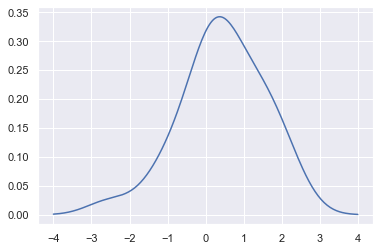

In [13]:
from scipy.integrate import trapz
density = np.sum(kernels, axis=0)   # 더하고
density /= trapz(density, support)  # 정규화
plt.plot(support, density);

**seaborn은 kdeplot()으로 kde곡선을 바로 구할 수 있음**

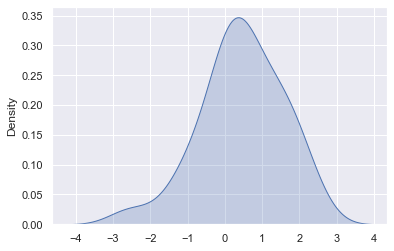

In [14]:
sns.kdeplot(x, shade=True) ; # kde 곡선만

- **bandwidth에 따른 KDE 변화**

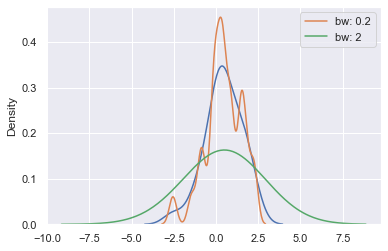

In [15]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2") # bandwidth
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

### 사이킷런을 이용한 Mean Shift 

make_blobs()를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행

In [18]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

meanshift= MeanShift(bandwidth=0.9) # bandwidth
cluster_labels = meanshift.fit_predict(X) # 군집 반환
print('cluster labels 유형:', np.unique(cluster_labels))
print(cluster_labels)

cluster labels 유형: [0 1 2 3 4 5 6 7]
[5 0 0 1 4 1 2 6 0 1 0 1 0 0 0 1 2 2 6 3 1 2 0 0 3 5 7 1 5 1 6 4 1 0 2 2 0
 2 7 3 2 1 3 5 4 4 0 1 0 0 0 2 1 5 5 1 2 2 0 4 1 5 0 2 2 1 2 6 1 6 7 0 0 1
 5 1 2 2 2 3 1 0 0 2 2 0 0 1 0 2 3 1 7 0 2 0 0 1 1 2 2 4 1 0 5 5 2 0 5 6 0
 1 2 5 0 0 6 2 1 1 2 2 1 0 2 0 3 2 1 4 1 6 2 2 0 2 2 0 2 1 5 1 4 2 2 0 3 3
 2 0 2 3 5 1 0 2 2 2 0 0 6 1 1 1 0 5 2 1 2 2 6 7 5 2 1 1 6 3 0 6 0 1 2 2 7
 6 1 2 4 4 1 1 6 2 6 2 5 2 0 2]


**커널함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재 수행**

In [20]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))
print(cluster_labels)

cluster labels 유형: [0 1 2]
[1 0 0 1 0 1 2 2 0 1 0 1 0 0 0 1 2 2 0 1 1 2 0 0 1 0 2 1 1 1 0 0 1 0 2 2 0
 2 2 1 2 1 1 1 0 0 0 1 0 0 0 2 1 1 1 1 2 2 0 0 1 1 0 2 2 1 2 2 1 2 2 0 0 1
 0 1 2 2 2 1 1 0 0 2 2 0 0 1 0 2 1 1 2 0 2 0 0 1 1 2 2 0 1 0 1 0 2 0 0 2 0
 1 2 1 0 0 0 2 1 1 2 2 1 0 2 0 1 2 1 0 1 2 2 2 0 2 2 0 2 1 1 1 0 2 2 0 1 1
 2 0 2 1 1 1 0 2 2 2 0 0 1 1 1 1 0 0 2 1 2 2 0 2 0 2 1 1 0 1 0 2 0 1 2 2 2
 0 1 2 0 0 1 1 2 2 2 2 1 2 0 2]


**최적의 bandwidth값을 estimate_bandwidth()로 계산 한 뒤에 다시 군집화 수행**

In [24]:
from sklearn.cluster import estimate_bandwidth  # estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.25) # quantile 샘플링 수 
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.689


In [25]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.25)

meanshift= MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


In [26]:
best_bandwidth

1.6889636737559222

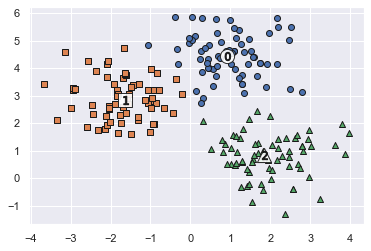

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_    # 중심점
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()


In [28]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64


- 단점 : bw에 민감
    - 영상쪽에 많이 활용